In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
df = pd.read_csv('../data/leads_df_cleaned.csv')
df.shape

C:\Users\ha\AppData\Local\Temp\ipykernel_24516\1400556642.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/leads_df_cleaned.csv')


(69646, 100)

In [4]:
df.isnull().sum()

Unnamed: 0                         0
ObjectID                           0
Lead_ID                            0
Name                               0
Name_Language_Code                 0
                                  ..
Priority_KUT                       0
Priority_KUT_Text                  0
Sealing_Demand_Amount__Currency    0
VAT_Number                         0
Dummy_Save                         0
Length: 100, dtype: int64

In [14]:

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [12]:
# 수치형: int, float
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 명목형: object, category (문자열 등)
nominal_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("🔢 수치형 칼럼:")
print(numeric_cols)

print("\n🔠 명목형 칼럼:")
print(nominal_cols)

🔢 수치형 칼럼:
['Unnamed: 0', 'Lead_ID', 'Approval_Status', 'Consistency_Status', 'Priority', 'Owner_Party_ID', 'Survey_Score', 'Expected_Revenue_Value', 'Score', 'Contact_Information_Gender', 'Contact_Information_Engagement_Score', 'Account_Status', 'Main_Contact_Person_Status', 'Lead_Life_Cycle_Status_Code', 'Channel', 'Priority_KUT', 'Sealing_Demand_Amount__Currency']

🔠 명목형 칼럼:
['ObjectID', 'Name', 'Name_Language_Code', 'Name_Language_Code_Text', 'Account_Party_ID', 'Account_Party_UUID', 'Account_Party_Name', 'Main_Contact_ID', 'Main_Contact_UUID', 'Main_Contact_Person_Name', 'Status', 'Status_Text', 'Approval_Status_Text', 'Consistency_Status_Text', 'Source', 'Source_Text', 'Priority_Text', 'Start_Date', 'End_Date', 'Category', 'Category_Text', 'Owner_Party_UUID', 'Employee_Responsible_UUID_Deprecated', 'Owner_Party_Name', 'Creation_Date_Time', 'Last_Change_Date_Time', 'Created_By_UUID', 'Last_Changed_By_UUID', 'Customer_Information_Country', 'Customer_Information_Country_Text', 'Conta

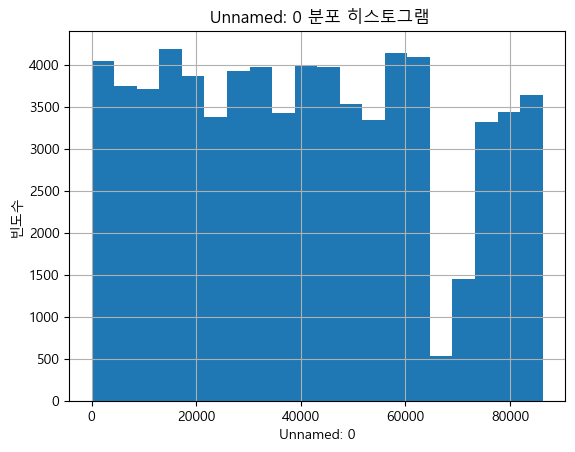

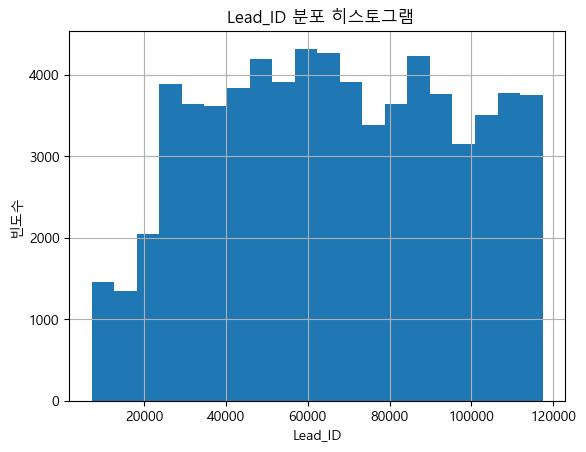

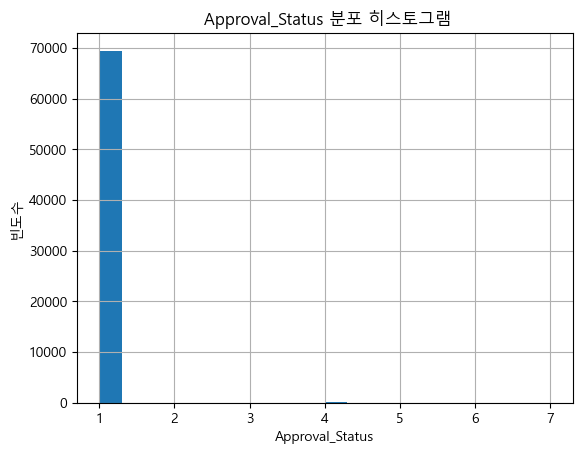

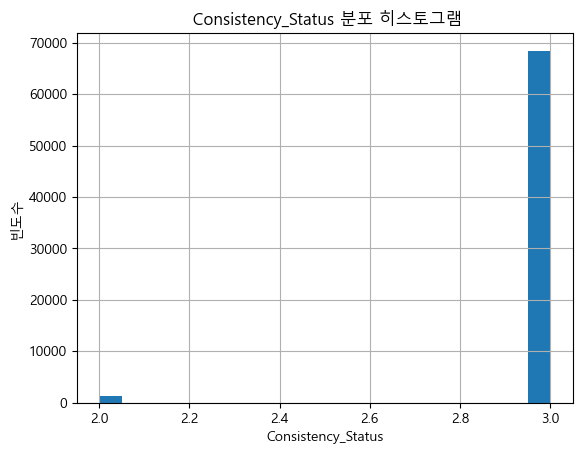

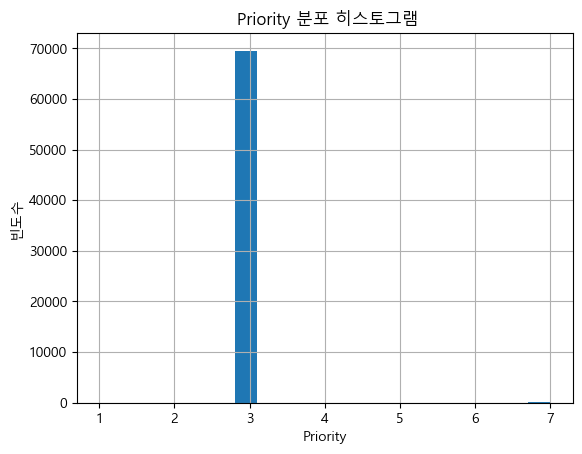

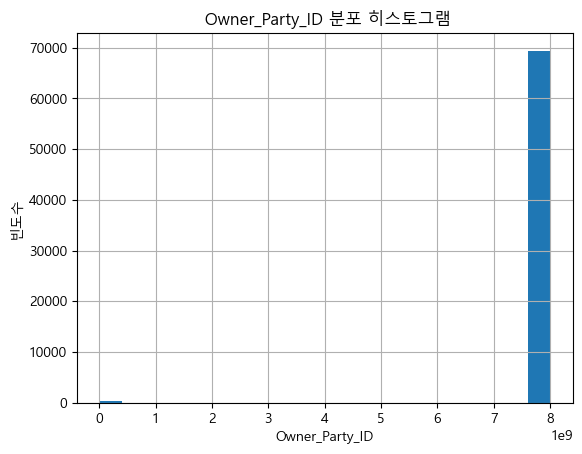

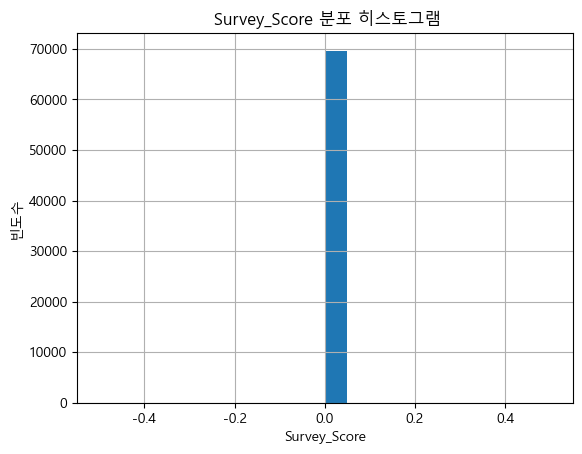

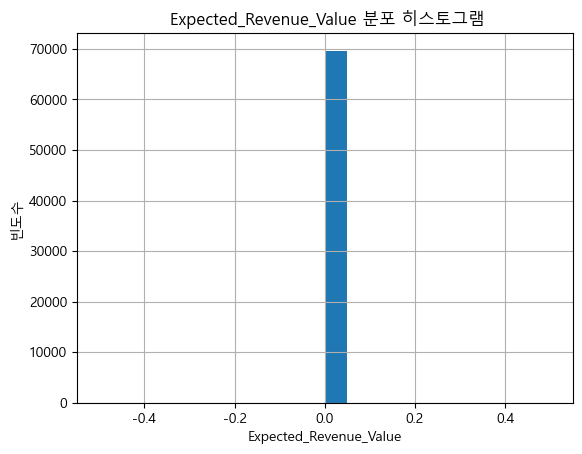

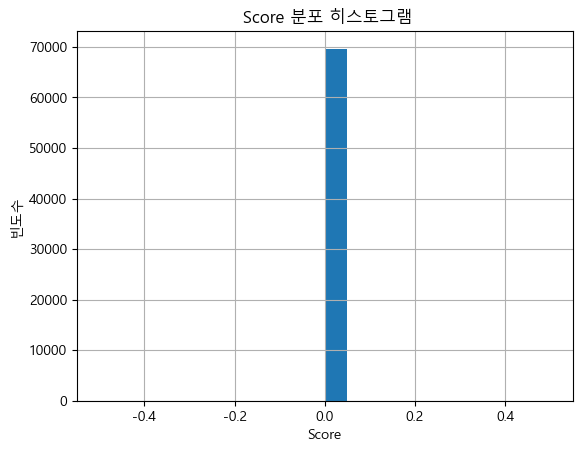

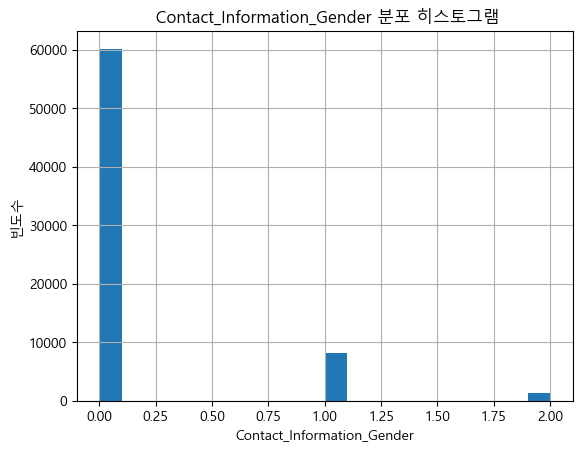

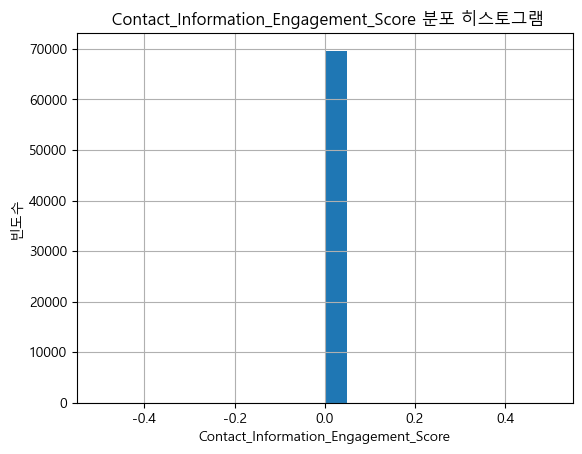

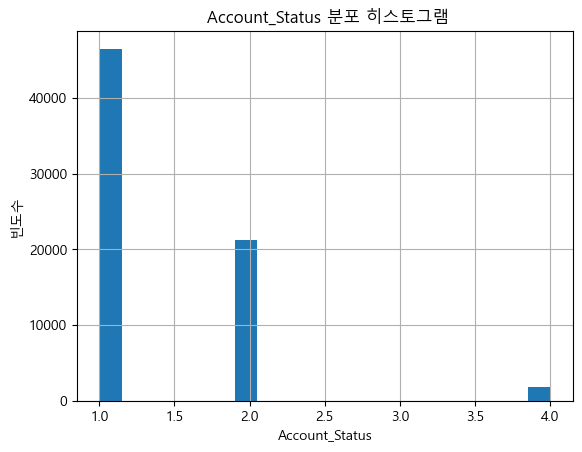

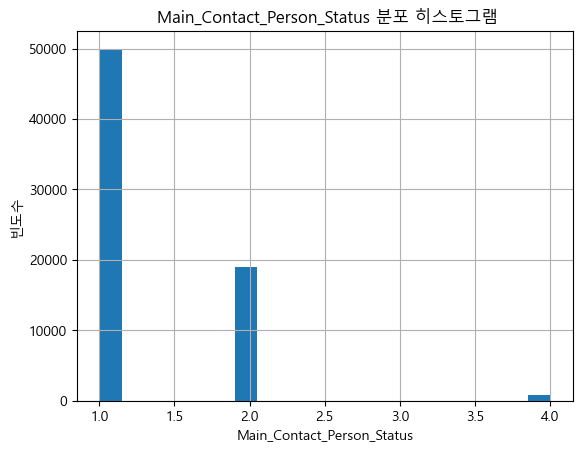

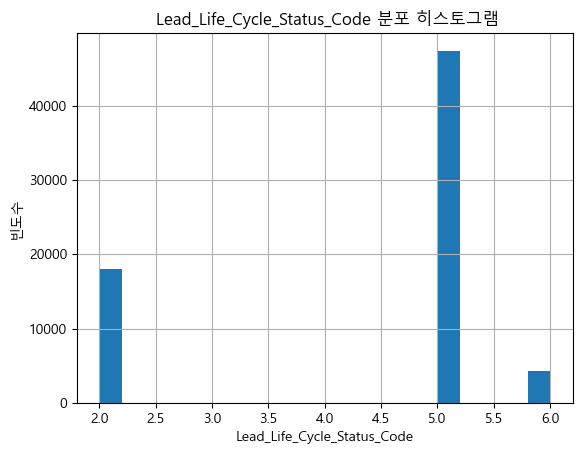

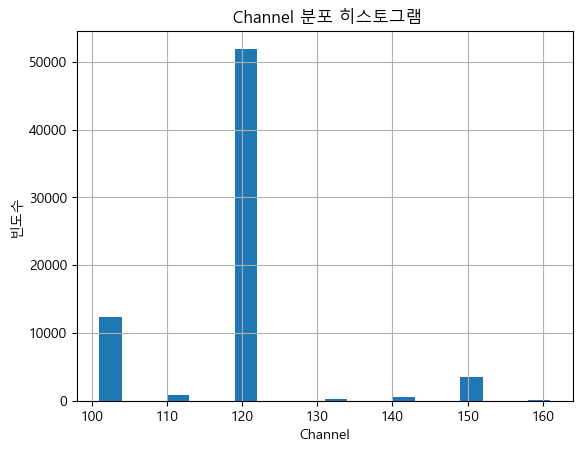

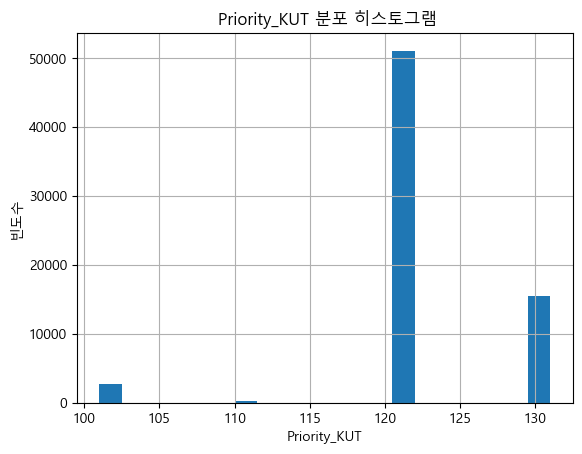

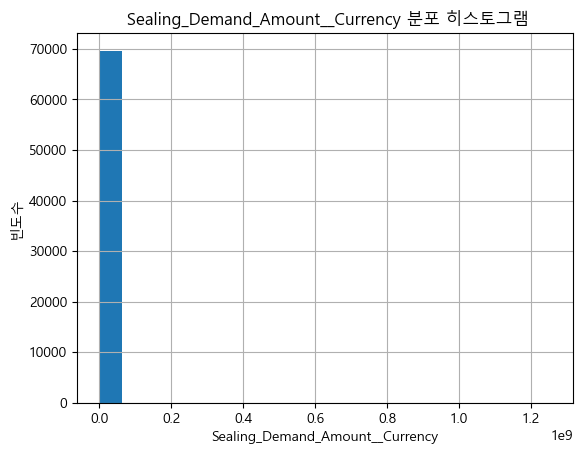

In [16]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    df[col].hist(bins=20)
    plt.title(f" {col} 분포 히스토그램")
    plt.xlabel(col)
    plt.ylabel("빈도수")
    plt.grid(True)
    plt.show()

In [17]:
# 필요한 칼럼만 선택
columns_to_keep = [
    "Lead_ID",
    "Contact_Information_Gender",
    "Lead_Life_Cycle_Status_Code",
    "Channel",
    "Priority_KUT"
]

df_selected = df[columns_to_keep]

# 결과 확인
print(df_selected.head())

   Lead_ID  Contact_Information_Gender  Lead_Life_Cycle_Status_Code  Channel  \
0  99866.0                         0.0                          5.0    121.0   
1  99868.0                         0.0                          6.0    121.0   
2  99870.0                         0.0                          5.0    121.0   
3  99911.0                         0.0                          5.0    121.0   
4  99912.0                         0.0                          2.0    121.0   

   Priority_KUT  
0         121.0  
1         131.0  
2         121.0  
3         121.0  
4         121.0  


# 명목형 변수

In [42]:
# 명목형 칼럼 리스트 수동 정의
nominal_cols = ['Lead_ID',
    'Name', 'Name_Language_Code_Text', 'Account_Party_ID','Account_Party_Name', 'Main_Contact_ID','Main_Contact_Person_Name', 
    'Status', 'Status_Text', 'Approval_Status_Text', 'Consistency_Status_Text', 'Source', 'Source_Text', 
    'Priority_Text','Category', 'Category_Text', 'Owner_Party_Name', 'Customer_Information_Country', 'Customer_Information_Country_Text',
    'Contact_Information_Gender_Text', 'Account_Status_Text','Main_Contact_Person_Status_Text', 'Lead_Life_Cycle_Status_Code_Text', 'Created_By', 'Last_Changed_By',
    'Continent', 'Channel_Text', 'ContactSource_Text', 'Priority_KUT_Text'
]

In [ ]:


# UUID 제거

# 요약 출력
for col in nominal_cols:
    if col in df.columns:
        print(f"\n🔸 칼럼: {col}")
        print(f" - 고유값 수: {df[col].nunique()}")
        print(f" - 결측치 수: {df[col].isna().sum()}")
        print(" - 상위 값 분포:")
        print(df[col].value_counts(dropna=False).head(5))
    else:
        print(f"\n⚠️ 칼럼 '{col}'은 DataFrame에 없음")



🔸 칼럼: Name
 - 고유값 수: 6254
 - 결측치 수: 0
 - 상위 값 분포:
Web Request                   27977
Member Registration            6485
Member Registration Upload     4448
Web Request H&M Website        1900
Electronic Catalog RfQ         1363
Name: Name, dtype: int64

🔸 칼럼: Name_Language_Code_Text
 - 고유값 수: 13
 - 결측치 수: 0
 - 상위 값 분포:
English          68271
Chinese            580
German             462
Japanese           165
Chinese trad.       87
Name: Name_Language_Code_Text, dtype: int64

🔸 칼럼: Account_Party_ID
 - 고유값 수: 57492
 - 결측치 수: 0
 - 상위 값 분포:
73801    74
28413    51
26438    44
24059    42
25635    38
Name: Account_Party_ID, dtype: int64

🔸 칼럼: Account_Party_Name
 - 고유값 수: 44654
 - 결측치 수: 0
 - 상위 값 분포:
Alicia Walker      195
Patrick Hill       168
Kelly Campbell     122
Natalie Ramirez    108
Billy Odonnell      90
Name: Account_Party_Name, dtype: int64

🔸 칼럼: Main_Contact_ID
 - 고유값 수: 66329
 - 결측치 수: 0
 - 상위 값 분포:
1150457.0    31
1321141.0    13
1024542.0    13
1116947.0    13
1225231.0

C:\Users\ha\AppData\Local\Temp\ipykernel_24516\346480669.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/leads_df_cleaned.csv")


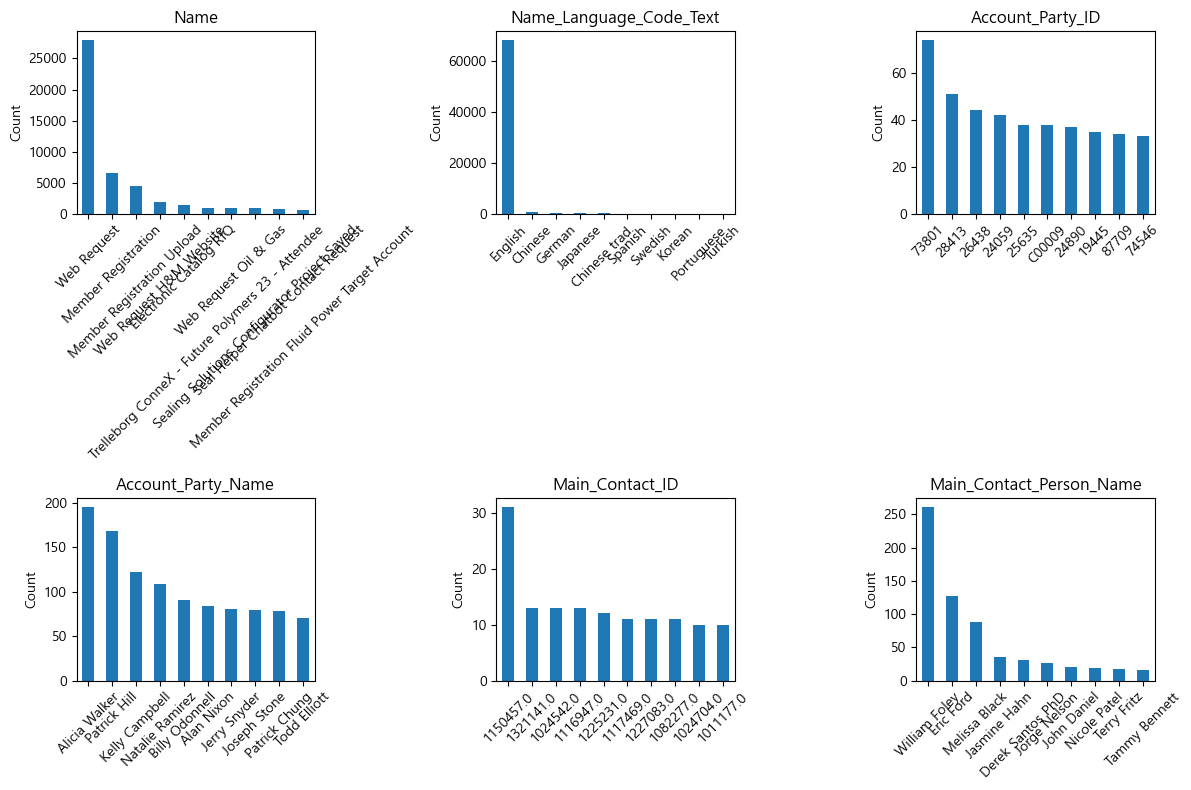

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시용 명목형 칼럼 4개 (필요한 걸로 교체)
nominal_cols_to_plot = [
    'Name', 'Name_Language_Code_Text', 'Account_Party_ID','Account_Party_Name', 'Main_Contact_ID','Main_Contact_Person_Name',
]

# 데이터 불러오기
df = pd.read_csv("../data/leads_df_cleaned.csv")

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # 2x2 배열 → 1D로

for i, col in enumerate(nominal_cols_to_plot):
    if col in df.columns:
        vc = df[col].value_counts().head(10)
        vc.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f"{col} 없음", ha='center', va='center')
        axes[i].set_axis_off()

plt.tight_layout()
plt.show()


C:\Users\ha\AppData\Local\Temp\ipykernel_24516\2181118824.py:12: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/leads_df_cleaned.csv")


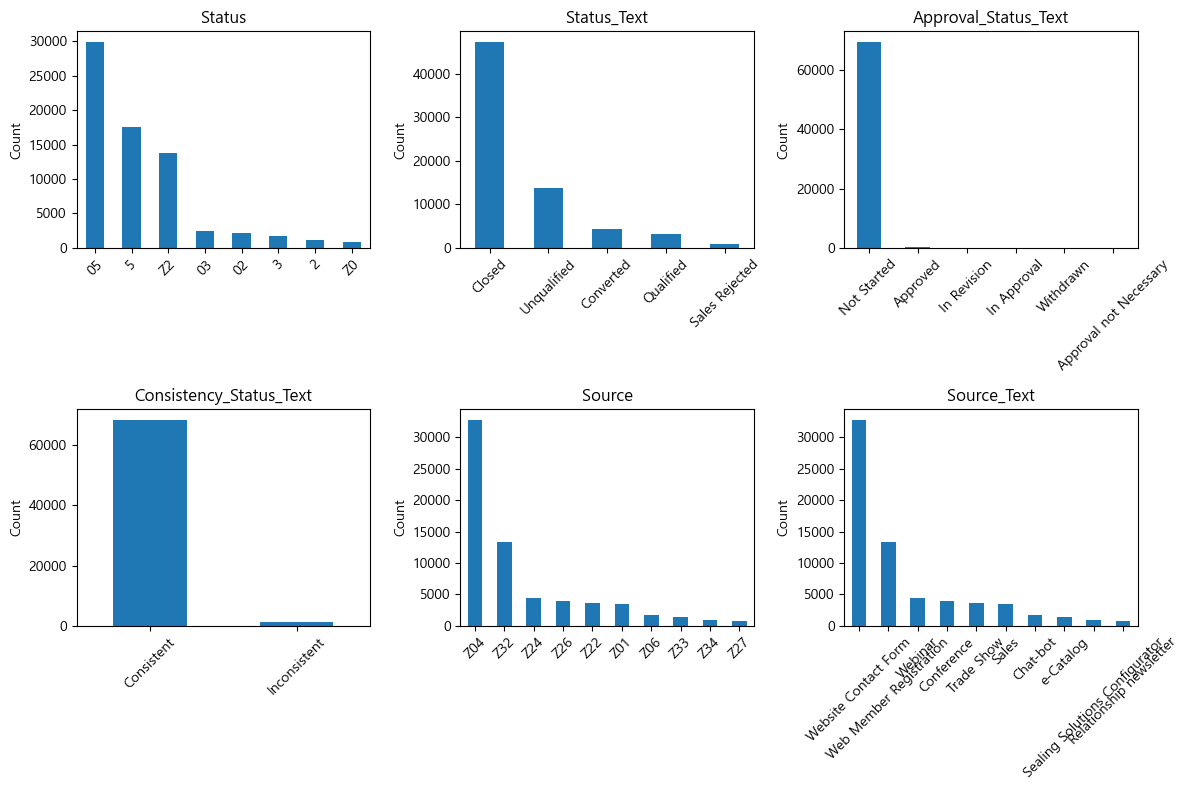

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시용 명목형 칼럼 6개 (필요한 걸로 교체)
nominal_cols_to_plot = [
    'Status', 'Status_Text', 'Approval_Status_Text', 'Consistency_Status_Text', 'Source', 'Source_Text', 


    ]

# 데이터 불러오기
df = pd.read_csv("../data/leads_df_cleaned.csv")

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  

for i, col in enumerate(nominal_cols_to_plot):
    if col in df.columns:
        vc = df[col].value_counts().head(10)
        vc.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f"{col} 없음", ha='center', va='center')
        axes[i].set_axis_off()

plt.tight_layout()
plt.show()


C:\Users\ha\AppData\Local\Temp\ipykernel_24516\1083893466.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/leads_df_cleaned.csv")


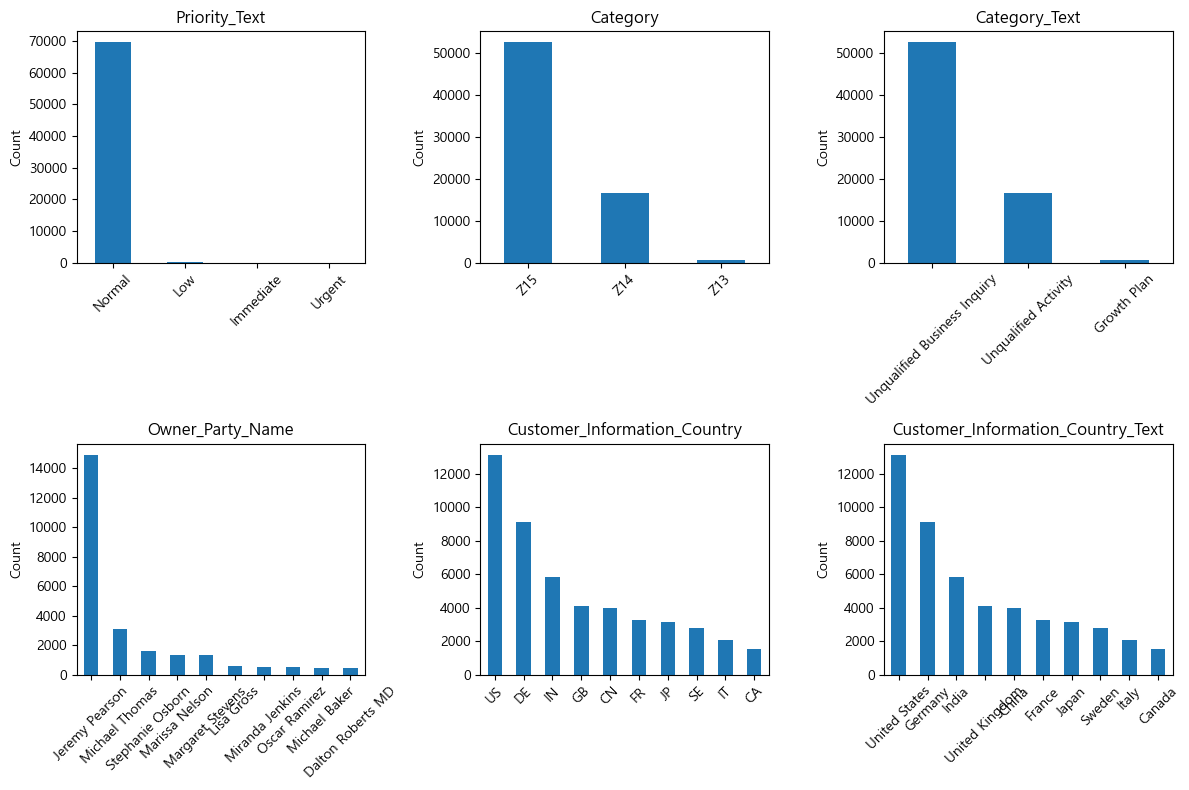

In [30]:

import pandas as pd
import matplotlib.pyplot as plt

# 예시용 명목형 칼럼 6개 (필요한 걸로 교체)
nominal_cols_to_plot = [
    'Priority_Text','Category', 'Category_Text', 'Owner_Party_Name', 'Customer_Information_Country', 'Customer_Information_Country_Text',
    ]

# 데이터 불러오기
df = pd.read_csv("../data/leads_df_cleaned.csv")

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  

for i, col in enumerate(nominal_cols_to_plot):
    if col in df.columns:
        vc = df[col].value_counts().head(10)
        vc.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f"{col} 없음", ha='center', va='center')
        axes[i].set_axis_off()

plt.tight_layout()
plt.show()


C:\Users\ha\AppData\Local\Temp\ipykernel_24516\2506858976.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/leads_df_cleaned.csv")


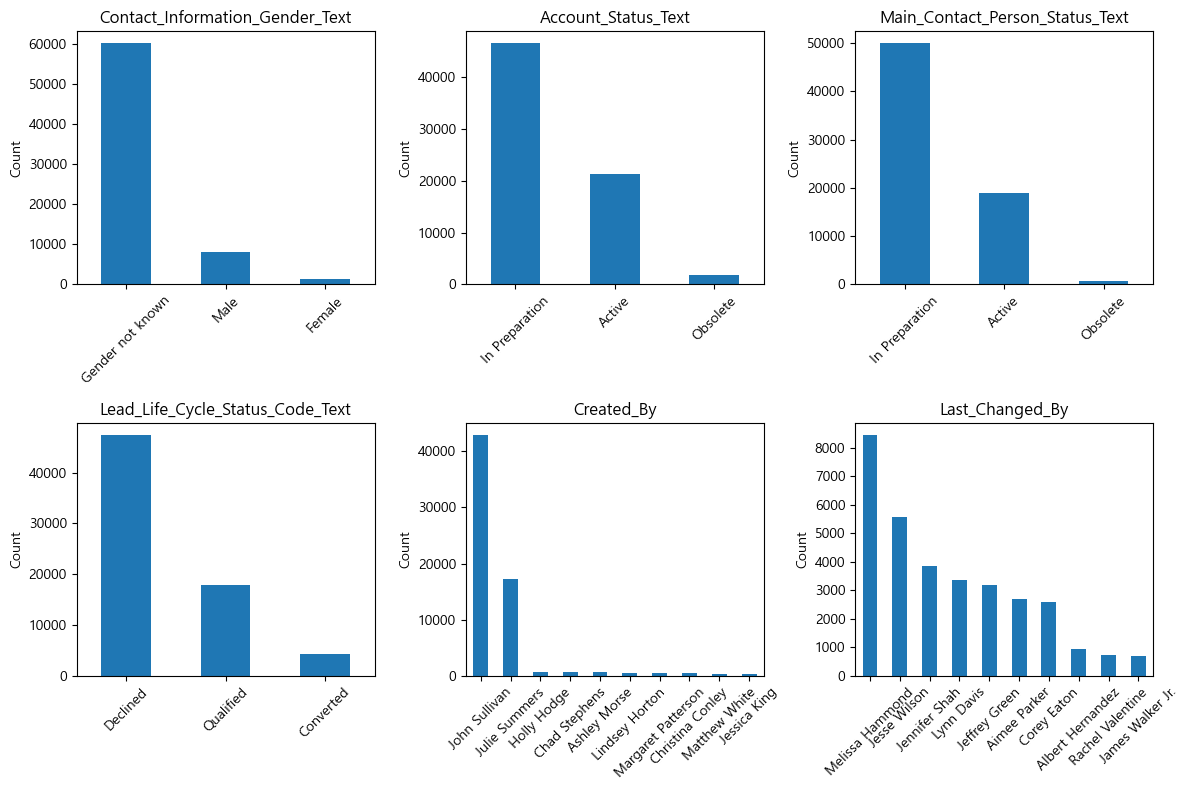

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시용 명목형 칼럼 6개 (필요한 걸로 교체)
nominal_cols_to_plot = [
    'Contact_Information_Gender_Text', 'Account_Status_Text','Main_Contact_Person_Status_Text', 'Lead_Life_Cycle_Status_Code_Text', 'Created_By', 'Last_Changed_By',

    ]

# 데이터 불러오기
df = pd.read_csv("../data/leads_df_cleaned.csv")

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  

for i, col in enumerate(nominal_cols_to_plot):
    if col in df.columns:
        vc = df[col].value_counts().head(10)
        vc.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f"{col} 없음", ha='center', va='center')
        axes[i].set_axis_off()

plt.tight_layout()
plt.show()


C:\Users\ha\AppData\Local\Temp\ipykernel_24516\3660383410.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/leads_df_cleaned.csv")


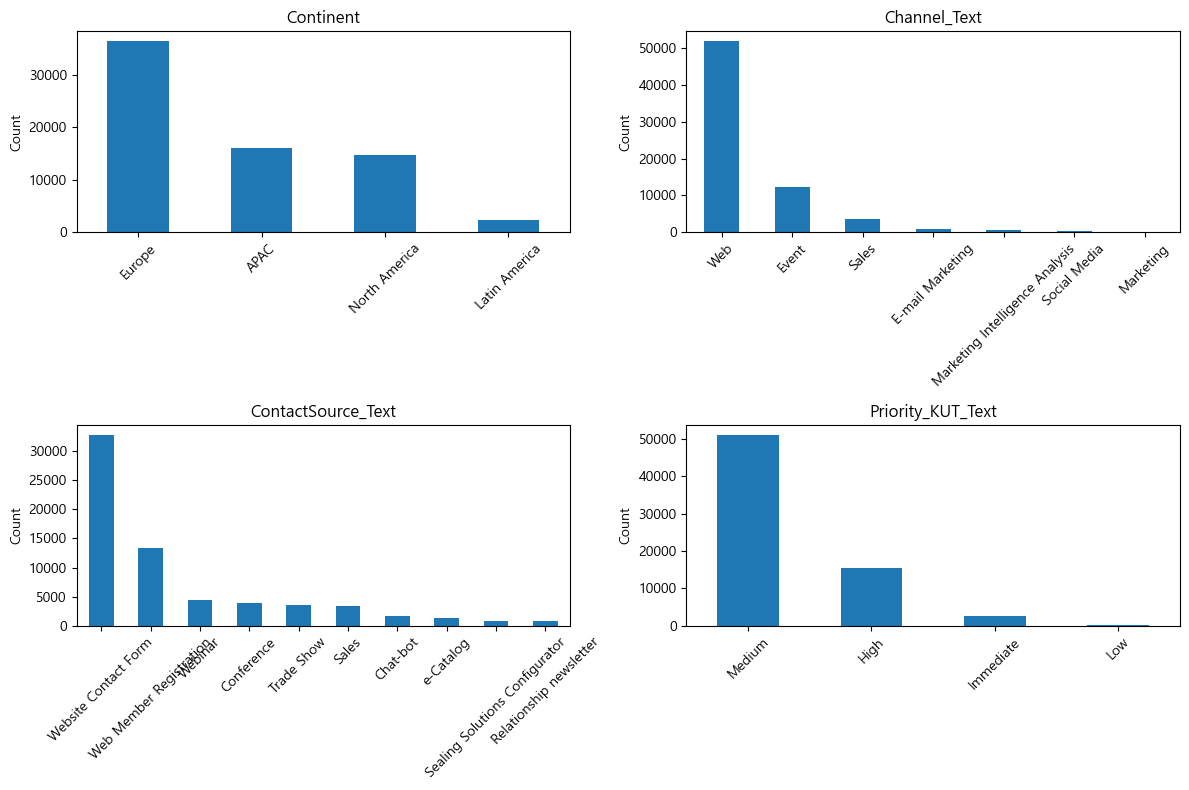

In [34]:

import pandas as pd
import matplotlib.pyplot as plt

# 예시용 명목형 칼럼 6개 (필요한 걸로 교체)
nominal_cols_to_plot = [
    'Continent', 'Channel_Text', 'ContactSource_Text', 'Priority_KUT_Text'

    ]

# 데이터 불러오기
df = pd.read_csv("../data/leads_df_cleaned.csv")

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  

for i, col in enumerate(nominal_cols_to_plot):
    if col in df.columns:
        vc = df[col].value_counts().head(10)
        vc.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f"{col} 없음", ha='center', va='center')
        axes[i].set_axis_off()

plt.tight_layout()
plt.show()


# data cleaning


In [54]:
# "Name_Language_Code_Text" 값이 "English"인 행만 선택
df_1 = df[nominal_cols]
df_english = df_1[df_1['Name_Language_Code_Text'] == 'English']
df_english.shape


(68271, 29)

In [55]:
new_cols = ['Lead_ID',
    'Name','Account_Party_Name','Main_Contact_Person_Name', 
    'Status_Text', 'Source_Text', 'Category_Text', 'Owner_Party_Name',  'Customer_Information_Country_Text',
    'Contact_Information_Gender_Text', 'Lead_Life_Cycle_Status_Code_Text', 'Last_Changed_By',
    'Continent', 'Channel_Text', 'ContactSource_Text', 'Priority_KUT_Text'
]
# status = y value

In [56]:
df_english = df_english[new_cols]
df_english.shape

(68271, 16)

In [58]:
df_english.to_csv("df_text_english.csv", index=False)

# Status_Text 가 y value일때 각각의 열로 분류분석 진행

### One-Hot 인코딩 → 학습/테스트 분리 → RandomForestClassifier 훈련 → 혼동행렬 시각화

In [59]:
# 📘 분류 분석 전체 파이프라인 (One-Hot 인코딩 + RandomForest)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:


# 1. 데이터 불러오기
df = pd.read_csv("df_text_english.csv")

# 2. 타깃(Y)와 특성(X) 분리
X = df.drop(columns=["Status_Text"])
y = df["Status_Text"]


In [63]:
# 방법 1: 고유값이 너무 많은 열 제외
#아래처럼 "ID, Name, Date"류의 식별자/고유 텍스트 칼럼은 제외하고 인코딩하세요:

columns_to_drop = [
    'Lead_ID', 'Name', 'Account_Party_Name', 'Main_Contact_Person_Name',
    'Owner_Party_Name', 'Last_Changed_By'
]

X_reduced = X.drop(columns=columns_to_drop)

# One-Hot 인코딩
X_encoded = pd.get_dummies(X_reduced.astype(str), drop_first=True)


In [64]:

# 4. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 5. 모델 훈련
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [65]:

# 6. 예측 및 평가
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

        Closed       1.00      1.00      1.00      9310
     Converted       1.00      1.00      1.00       817
     Qualified       0.59      0.33      0.42       610
Sales Rejected       0.54      0.25      0.35       173
   Unqualified       0.85      0.96      0.90      2745

      accuracy                           0.95     13655
     macro avg       0.79      0.71      0.73     13655
  weighted avg       0.94      0.95      0.95     13655



In [67]:

# 7. 정확도 확인
accuracy = clf.score(X_test, y_test)
print(f"✅ 모델 정확도: {accuracy:.4f}")



✅ 모델 정확도: 0.9518


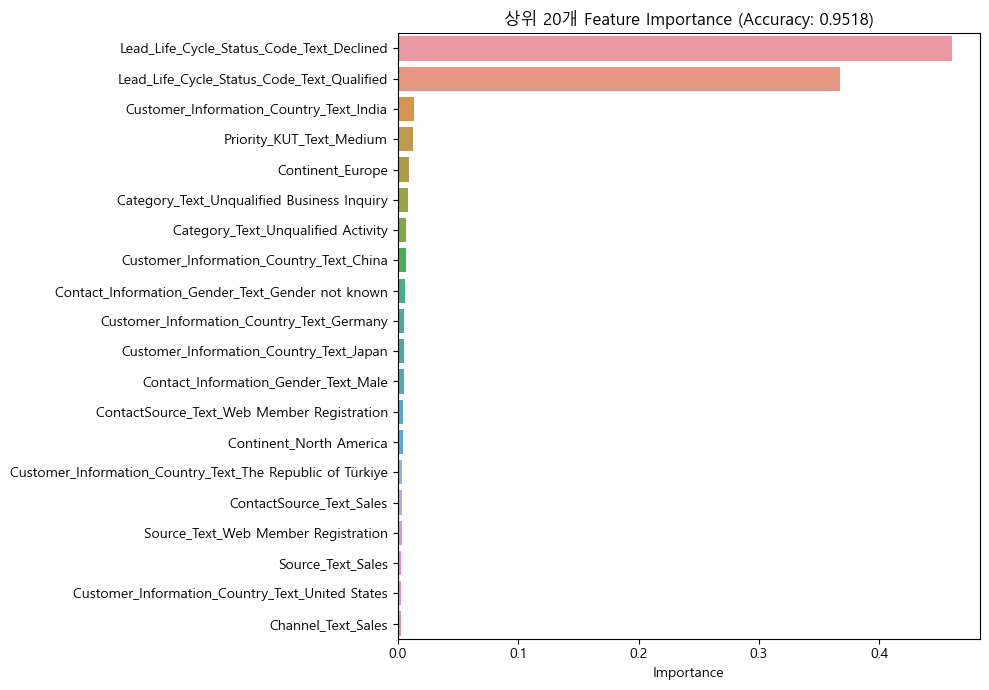

In [69]:
import numpy as np
# 8. 변수 중요도 추출
importances = clf.feature_importances_
feature_names = X_encoded.columns

# 9. 상위 20개 변수 시각화
top_indices = np.argsort(importances)[-20:][::-1]
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 7))
sns.barplot(x=top_importances, y=top_features)
plt.title(f"상위 20개 Feature Importance (Accuracy: {accuracy:.4f})")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [73]:
# 샘플 입력 정의 (학습에 쓰였던 컬럼 기준)
sample_dict = {
    "Source_Text": "Web",
    "Category_Text": "Hot",
    "Customer_Information_Country_Text": "United States",
    "Contact_Information_Gender_Text": "Female",
    "Lead_Life_Cycle_Status_Code_Text": "Open",
    "Continent": "North America",
    "Channel_Text": "Event",
    "ContactSource_Text": "Referral",
    "Priority_KUT_Text": "High"
}

# DataFrame으로 만들기
sample_df = pd.DataFrame([sample_dict])

# 같은 방식으로 원-핫 인코딩
sample_encoded = pd.get_dummies(sample_df.astype(str), drop_first=True)

# 🔧 훈련에 사용한 전체 열 목록 확보
trained_columns = X_encoded.columns

# 🔧 누락된 열을 0으로 채우고, 순서 맞추기
for col in trained_columns:
    if col not in sample_encoded.columns:
        sample_encoded[col] = 0
sample_encoded = sample_encoded[trained_columns]



C:\Users\ha\AppData\Local\Temp\ipykernel_24516\1069863166.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_encoded[col] = 0
C:\Users\ha\AppData\Local\Temp\ipykernel_24516\1069863166.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_encoded[col] = 0
C:\Users\ha\AppData\Local\Temp\ipykernel_24516\1069863166.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [74]:
# 예측
predicted_status = clf.predict(sample_encoded)
print("🎯 예측된 Status_Text:", predicted_status[0])


🎯 예측된 Status_Text: Converted


In [72]:
clf.predict_proba(sample_encoded)

array([[0.21, 0.63, 0.08, 0.  , 0.08]])